In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("oil_production.csv")
df1 = pd.read_csv("forecast.csv")

In [3]:
x = df.describe()

In [4]:
x.to_csv("Description.csv")

In [5]:
df.head()

,Unnamed: 0,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,0,2009-01-30,257.442241,105.339191,163.294586,35.298817,94.147654,61.049726,4535.43,649388.07,298.19
1,1,2009-02-11,261.481233,105.364799,164.352071,34.697693,97.129162,65.804801,4379.88,629307.34,143.54
2,2,2009-02-20,264.386001,105.410873,166.214057,34.779443,98.171944,64.987169,4509.07,638750.17,108.74
3,3,2009-02-22,266.709086,105.395959,166.273529,34.054792,100.435557,67.330436,4319.02,612912.62,106.60
4,4,2009-02-23,266.667137,105.410516,166.513059,34.395363,100.154078,66.986427,4417.66,625514.01,117.37


In [6]:
df1.head()

,Unnamed: 0,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,1,303.033518,105.402696,182.144942,22.832986,120.888576,89.620148,1869.70,285246.16,7.13
1,2,295.586061,105.775486,181.867887,31.249966,113.718175,80.120465,3124.09,509954.88,1.16
2,3,297.662702,105.751875,180.832060,28.518930,116.830642,84.250990,2608.28,383426.67,0.97
3,4,295.935519,105.811114,180.501045,30.227902,115.434474,82.359026,3051.80,418474.00,4.89
4,5,295.551657,105.831299,180.345781,29.974052,115.205876,82.168501,2982.63,422763.00,1.85


In [7]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
t = df["DATEPRD"]

In [9]:
df.drop("DATEPRD",axis = 1, inplace = True)

In [10]:
df.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,257.442241,105.339191,163.294586,35.298817,94.147654,61.049726,4535.43,649388.07,298.19
1,261.481233,105.364799,164.352071,34.697693,97.129162,65.804801,4379.88,629307.34,143.54
2,264.386001,105.410873,166.214057,34.779443,98.171944,64.987169,4509.07,638750.17,108.74
3,266.709086,105.395959,166.273529,34.054792,100.435557,67.330436,4319.02,612912.62,106.60
4,266.667137,105.410516,166.513059,34.395363,100.154078,66.986427,4417.66,625514.01,117.37


In [11]:
X = df.iloc[:,0:6]
Y = df.iloc[:,6]

In [12]:
X.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE
0,257.442241,105.339191,163.294586,35.298817,94.147654,61.049726
1,261.481233,105.364799,164.352071,34.697693,97.129162,65.804801
2,264.386001,105.410873,166.214057,34.779443,98.171944,64.987169
3,266.709086,105.395959,166.273529,34.054792,100.435557,67.330436
4,266.667137,105.410516,166.513059,34.395363,100.154078,66.986427


In [13]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNet, SGDRegressor, Lasso

In [14]:
from sklearn.svm import SVR, LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

In [15]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.io as pio

In [16]:
test_fraction = 0.15
val_fraction = 0.15
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = test_fraction, shuffle = True, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size 
                                                  = val_fraction/(1-test_fraction), shuffle = True, random_state = 1000)

In [17]:
from sklearn.model_selection import TimeSeriesSplit

In [18]:
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([1, 2, 3, 4, 5, 6])
#tscv = TimeSeriesSplit(n_splits=5)
#print(tscv)  
#TimeSeriesSplit(max_train_size=None, n_splits=5)
#for train_index, test_index in tscv.split(X):
 #   print("TRAIN:", train_index, "TEST:", test_index)
   # X_train, X_test = X[train_index], X[test_index]
   # y_train, y_test = y[train_index], y[test_index]

In [19]:
x_train.shape

(1655, 6)

In [20]:
y_val.shape

(355,)

In [21]:
y_test.shape

(355,)

In [22]:
type(x_train)

pandas.core.frame.DataFrame

In [23]:
scaler_x = MinMaxScaler()
x_train = scaler_x.fit_transform(x_train.as_matrix())
x_val = scaler_x.transform(x_val.as_matrix())
x_test = scaler_x.transform(x_test.as_matrix())

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1,1))
y_val = scaler_y.transform(y_val.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [24]:
LR = LinearRegression()
LR.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
from scipy.stats import pearsonr as r
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [26]:
print(LR.score(x_val, y_val))
print(LR.score(x_test, y_test))

0.8213196747884767
0.8027454693684412


In [27]:
r2(y_val, LR.predict(x_val))

0.8213196747884767

In [28]:
r2(y_test, LR.predict(x_test))

0.802745469368441

In [29]:
mse(LR.predict(x_val), y_val)

0.0059780029517817815

In [30]:
mse(LR.predict(x_test), y_test)

0.00609204672509473

In [31]:
r(y_test, LR.predict(x_test))[0]

array([0.90119046])

In [32]:
y_act = scaler_y.inverse_transform(y_test)
y_pred = scaler_y.inverse_transform(LR.predict(x_test))

In [33]:
mse(y_act,y_pred)

187243.40728167628

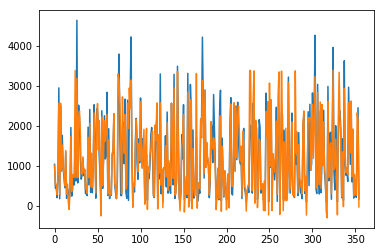

In [34]:
plt.plot(y_act)
plt.plot(y_pred)

In [35]:
y_pred_LR = scaler_y.inverse_transform(LR.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_LR.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [36]:
LR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [37]:
m = pd.DataFrame(y_act)

In [38]:
m.shape

(355, 1)

In [39]:
type(y_pred)

numpy.ndarray

In [40]:
trace1 = go.Scatter(x = np.arange(len(y_act)),
                    y = y_act.reshape(-1,),
                   name = "Actual")
trace2 = go.Scatter(x = np.arange(len(y_act)), 
         y = y_pred.reshape(-1,),
                   name = "Predicted")
data = [trace1, trace2]
layout = {"title": "Linear Regression"}
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [41]:
MLP = MLPRegressor(hidden_layer_sizes=(50,),  activation='relu', solver='adam', alpha=0.0001, batch_size=200,
    learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.5, nesterovs_momentum=True,
    early_stopping=True, validation_fraction=0.15, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
MLP.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(activation='relu', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.5,
       nesterovs_momentum=True, power_t=0.5, random_state=9, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.15, verbose=False,
       warm_start=False)

In [42]:
MLP.score(x_val, y_val)

0.8563031127707872

In [43]:
MLP.score(x_test, y_test)

0.8426242482307059

In [44]:
MLP.predict(x_test).shape

(355,)

In [45]:
y_test.shape

(355, 1)

In [46]:
prediction = MLP.predict(x_test)
prediction.min()

-0.02534784947585821

In [47]:
y_pred_mlp = scaler_y.inverse_transform(MLP.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_mlp.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [48]:
print(mse(y_val, MLP.predict(x_val)))
print(mse(y_test, MLP.predict(x_test)))
r(y_test, MLP.predict(x_test).reshape(-1,1))[0]

0.004807582564007381
0.0048604228765027875


array([0.92255379])

In [49]:
y_pre = scaler_y.inverse_transform(MLP.predict(x_test).reshape(-1,1))

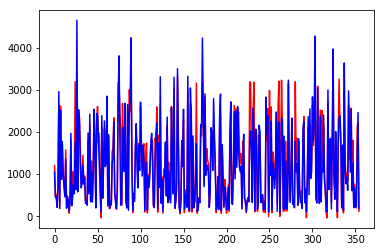

In [50]:
plt.plot(y_pre, "r")
plt.plot(y_act, "b")

In [51]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [52]:
KRR.fit(x_train, y_train)

KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [53]:
KRR.score(x_val, y_val)

0.8553893514022035

In [54]:
KRR.score(x_test, y_test)

0.8282217021343219

In [55]:
print(mse(y_val, KRR.predict(x_val)))
print(mse(y_test, KRR.predict(x_test)))
r(y_test, KRR.predict(x_test).reshape(-1,1))[0]

0.0048381537427432085
0.005305233870189865


array([0.91266293])

In [56]:
y_pred = scaler_y.inverse_transform(KRR.predict(x_test))

In [57]:
y_pred.max()

3428.9206885002422

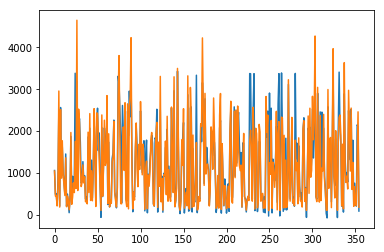

In [58]:
plt.plot(y_pred)
plt.plot(y_act)

In [59]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [60]:
GBoost.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [61]:
GBoost.score(x_val, y_val)

0.9554588766086636

In [62]:
GBoost.score(x_test, y_test)

0.9597042224702679

In [63]:
print(mse(y_val, GBoost.predict(x_val)))
print(mse(y_test, GBoost.predict(x_test)))
r(y_test, GBoost.predict(x_test).reshape(-1,1))[0]

0.001490186268655354
0.0012445025153499547


array([0.98044863])

In [64]:
y_pred_GBM = scaler_y.inverse_transform(GBoost.predict(x_test).reshape(-1,1))

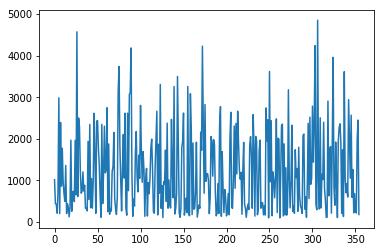

In [65]:
plt.plot(scaler_y.inverse_transform(GBoost.predict(x_test).reshape(-1,1)))

In [66]:
y_pred_GBM.min()

97.53538102126501

In [67]:
trace1 = go.Scatter(x = np.arange(len(y_act)),
                    y = y_act.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
trace2 = go.Scatter(x = np.arange(len(y_act)), 
         y = y_pred_GBM.reshape(-1,),
                   name = "Predicted",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1, trace2]
layout = {"title": "GBM"}
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [68]:
y_pred_gbm = scaler_y.inverse_transform(GBoost.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_gbm.reshape(-1,),
                   name = "Gradient Boosting Machine",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig,filename='show-legend')

In [69]:
import xgboost as xgb
import lightgbm as lgb

In [70]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=300,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [71]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=300, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [72]:
model_xgb.score(x_val, y_val)

0.9185484298255124

In [73]:
model_xgb.score(x_test, y_test)

0.9322084276979039

In [74]:
print(mse(y_val, model_xgb.predict(x_val)))
print(mse(y_test, model_xgb.predict(x_test)))
r(y_test, model_xgb.predict(x_test).reshape(-1,1))[0]

0.0027250774608448378
0.0020936879102838347


array([0.96572729])

In [75]:
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(x_test).reshape(-1,1))

In [76]:
trace1 = go.Scatter(x = np.arange(len(y_act)),
                    y = y_act.reshape(-1,),
                   name = "Actual")
trace2 = go.Scatter(x = np.arange(len(y_act)), 
         y = y_pred_xgb.reshape(-1,),
                   name = "XGBoost")
data = [trace1, trace2]
layout = {"title": "GBM"}
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [77]:
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_xgb.reshape(-1,),
                   name = "Extreme Gradient Boosting",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [78]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [79]:
model_lgb.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       learning_rate=0.05, max_bin=55, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=6, min_split_gain=0.0,
       min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
       num_leaves=5, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [80]:
model_lgb.score(x_val, y_val)

0.8939194635984749

In [81]:
model_lgb.score(x_test, y_test)

0.933927589724719

In [82]:
print(mse(y_val, model_lgb.predict(x_val)))
print(mse(y_test, model_lgb.predict(x_test)))
r(y_test, model_lgb.predict(x_test).reshape(-1,1))[0]

0.0035490743537890945
0.002040592980794339


array([0.96667433])

In [83]:
y_pred_lgb = scaler_y.inverse_transform(model_lgb.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_lgb.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [84]:
model_rf = RandomForestRegressor(n_estimators = 100)

In [85]:
model_rf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
model_rf.score(x_val, y_val)

0.9558438086518128

In [87]:
model_rf.score(x_test, y_test)

0.9589944546302378

In [88]:
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_rf.reshape(-1,),
                   name = "Random Forest",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [89]:
print(mse(y_val, model_rf.predict(x_val)))
print(mse(y_test, model_rf.predict(x_test)))
r(y_test, model_rf.predict(x_test).reshape(-1,1))[0]

0.0014773078228194326
0.001266423121338517


array([0.97957948])

In [90]:
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(x_test).reshape(-1,1))

In [91]:
model_ada = AdaBoostRegressor(n_estimators = 50)

In [92]:
model_ada.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [93]:
model_ada.score(x_val, y_val)

0.9027278219844269

In [94]:
model_ada.score(x_test, y_test)

0.8989597792105974

In [95]:
print(mse(y_val, model_ada.predict(x_val)))
print(mse(y_test, model_ada.predict(x_test)))
r(y_test, model_ada.predict(x_test).reshape(-1,1))[0]

0.0032543782680883398
0.0031205455418038806


array([0.9537105])

In [96]:
y_pred_ada = scaler_y.inverse_transform(model_ada.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ada.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [97]:
model_sgd = SGDRegressor()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



In [98]:
model_sgd.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [99]:
model_sgd.score(x_val, y_val)

0.5945418178877635

In [100]:
model_svr = SVR()
model_svr.fit(x_train, y_train)
model_svr.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8556034138950994

In [101]:
model_svr.score(x_test, y_test)

0.8456479559797497

In [102]:
print(mse(y_val, model_svr.predict(x_val)))
print(mse(y_test, model_svr.predict(x_test)))
r(y_test, model_svr.predict(x_test).reshape(-1,1))[0]

0.004830991979337625
0.004767038106930052


array([0.92876782])

In [103]:
y_pred_svr = scaler_y.inverse_transform(model_svr.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_svr.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [104]:
model_lsvr = LinearSVR()
model_lsvr.fit(x_train, y_train)
model_lsvr.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7161730434144031

In [105]:
model_ett = ExtraTreesRegressor(n_estimators = 500)
model_ett.fit(x_train, y_train)
model_ett.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9651194230198864

In [106]:
model_ett.score(x_test, y_test)

0.9661722389667277

In [107]:
print(mse(y_val, model_ett.predict(x_val)))
print(mse(y_test, model_ett.predict(x_test)))
r(y_test, model_ett.predict(x_test).reshape(-1,1))[0]

0.0011669790274901701
0.0010447430543684686


array([0.98347557])

In [108]:
y_pred_ett = scaler_y.inverse_transform(model_ett.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ett.reshape(-1,),
                   name = "Extra Trees Regression",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [109]:
model_knr = KNeighborsRegressor(n_neighbors = 3)
model_knr.fit(x_train, y_train)
model_knr.score(x_val, y_val)

0.9339411219035991

In [110]:
model_knr.score(x_test, y_test)

0.9522016838765777

In [111]:
print(mse(y_val, model_knr.predict(x_val)))
print(mse(y_test, model_knr.predict(x_test)))
r(y_test, model_knr.predict(x_test).reshape(-1,1))[0]

0.0022100931805680976
0.0014762123550339894


array([0.97658603])

In [112]:
y_pred_knr = scaler_y.inverse_transform(model_knr.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_knr.reshape(-1,),
                   name = "Kneighbors regression",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [113]:
model_dct = DecisionTreeRegressor(max_depth = 10)
model_dct.fit(x_train, y_train)
model_dct.score(x_val, y_val)

0.9339635413943492

In [114]:
model_dct.score(x_test, y_test)

0.9504151996439612

In [115]:
print(mse(y_val, model_dct.predict(x_val)))
print(mse(y_test, model_dct.predict(x_test)))
r(y_test, model_dct.predict(x_test).reshape(-1,1))[0]

0.0022093431048016477
0.0015313864764288164


array([0.97515618])

In [116]:
y_pred_dct = scaler_y.inverse_transform(model_dct.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_dct.reshape(-1,),
                   name = "Decision Tree Regression",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [117]:
#{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

In [118]:
model_ridge = Ridge(alpha = 0.05, solver = 'svd')
model_ridge.fit(x_train, y_train)
model_ridge.score(x_val, y_val)

0.8250839714841833

In [119]:
model_ridge.score(x_test, y_test)

0.8018458553706175

In [120]:
print(mse(y_val, model_ridge.predict(x_val)))
print(mse(y_test, model_ridge.predict(x_test)))
r(y_test, model_ridge.predict(x_test).reshape(-1,1))[0]

0.00585206308273533
0.006119830576201937


array([0.89995406])

In [121]:
y_pred_ridge = scaler_y.inverse_transform(model_ridge.predict(x_test).reshape(-1,1))
trace1 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ridge.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = go.Layout(
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [122]:
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)
model_lasso.score(x_val, y_val)

-0.00814706223824091

In [123]:
model_elas = ElasticNet()
model_elas.fit(x_train, y_train)
model_elas.score(x_val, y_val)

-0.00814706223824091

In [124]:
model_lassocv = LassoCV()
model_lassocv.fit(x_train, y_train)
model_lassocv.score(x_val, y_val)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8251389690988654

In [125]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import ARDRegression, BayesianRidge, ElasticNetCV, HuberRegressor, Lars, LarsCV


(array([674., 326., 184., 178., 166.,  47.,  31.,  40.,   8.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

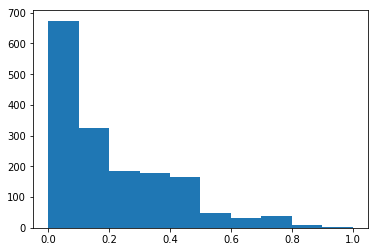

In [126]:
plt.hist(y_train)

(array([131.,  50.,  51.,  32.,  39.,  30.,  11.,   5.,   2.,   4.]),
 array([2.14647239e-04, 8.22160253e-02, 1.64217403e-01, 2.46218781e-01,
        3.28220160e-01, 4.10221538e-01, 4.92222916e-01, 5.74224294e-01,
        6.56225672e-01, 7.38227050e-01, 8.20228428e-01]),
 <a list of 10 Patch objects>)

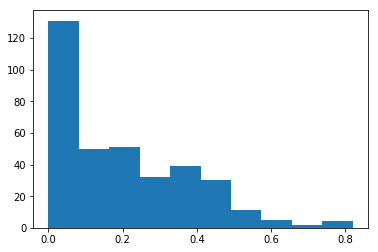

In [127]:
plt.hist(y_test)

(array([138.,  76.,  33.,  42.,  25.,  20.,   5.,   9.,   5.,   2.]),
 array([-1.08225499e-05,  8.64590060e-02,  1.72928835e-01,  2.59398663e-01,
         3.45868492e-01,  4.32338320e-01,  5.18808149e-01,  6.05277977e-01,
         6.91747806e-01,  7.78217634e-01,  8.64687463e-01]),
 <a list of 10 Patch objects>)

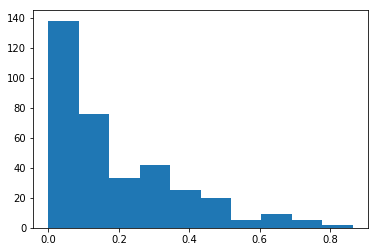

In [128]:
plt.hist(y_val)

In [129]:
df1.drop("Unnamed: 0", axis = 1, inplace = True)

In [130]:
df1.head()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,303.033518,105.402696,182.144942,22.832986,120.888576,89.620148,1869.70,285246.16,7.13
1,295.586061,105.775486,181.867887,31.249966,113.718175,80.120465,3124.09,509954.88,1.16
2,297.662702,105.751875,180.832060,28.518930,116.830642,84.250990,2608.28,383426.67,0.97
3,295.935519,105.811114,180.501045,30.227902,115.434474,82.359026,3051.80,418474.00,4.89
4,295.551657,105.831299,180.345781,29.974052,115.205876,82.168501,2982.63,422763.00,1.85


In [131]:
X1 = df1.iloc[:,0:6]
Y1 = df1.iloc[:,6]

In [132]:
Y1.head()

0    1869.70
1    3124.09
2    2608.28
3    3051.80
4    2982.63
Name: BORE_OIL_VOL, dtype: float64

In [133]:
scaler_x = MinMaxScaler()
x_forecast = scaler_x.fit_transform(X1.as_matrix())
y_forecast = scaler_y.fit_transform(Y1.reshape(-1,1))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



(array([674., 326., 184., 178., 166.,  47.,  31.,  40.,   8.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

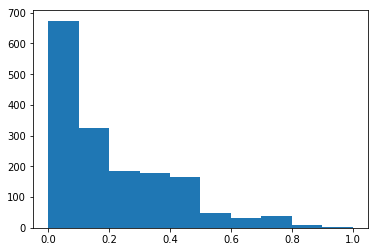

In [134]:
plt.hist(y_train)

(array([138.,  76.,  33.,  42.,  25.,  20.,   5.,   9.,   5.,   2.]),
 array([-1.08225499e-05,  8.64590060e-02,  1.72928835e-01,  2.59398663e-01,
         3.45868492e-01,  4.32338320e-01,  5.18808149e-01,  6.05277977e-01,
         6.91747806e-01,  7.78217634e-01,  8.64687463e-01]),
 <a list of 10 Patch objects>)

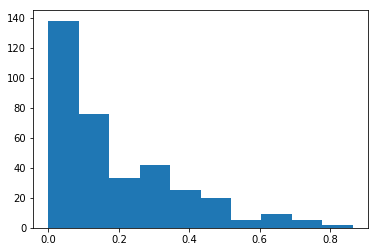

In [135]:
plt.hist(y_val)

(array([131.,  50.,  51.,  32.,  39.,  30.,  11.,   5.,   2.,   4.]),
 array([2.14647239e-04, 8.22160253e-02, 1.64217403e-01, 2.46218781e-01,
        3.28220160e-01, 4.10221538e-01, 4.92222916e-01, 5.74224294e-01,
        6.56225672e-01, 7.38227050e-01, 8.20228428e-01]),
 <a list of 10 Patch objects>)

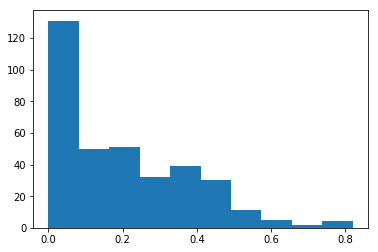

In [136]:
plt.hist(y_test)

(array([ 4.,  2.,  1.,  4.,  5.,  4.,  2., 12., 33.,  9., 22., 10.,  5.,
        16., 22., 20., 16., 21., 20., 17., 15., 23., 44.,  9., 12., 27.,
        20., 10., 21.,  7.,  8., 13., 18., 12., 18., 31., 50., 20., 14.,
        24., 30., 23., 20., 66., 28., 28., 17., 15., 16.,  9.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

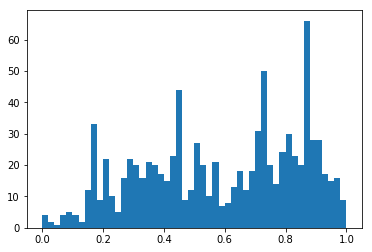

In [137]:
plt.hist(y_forecast, bins = 50)

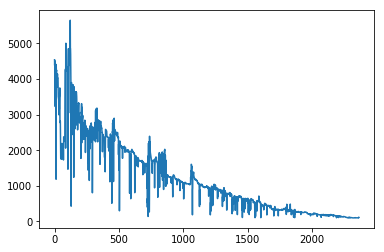

In [138]:
plt.plot(Y)

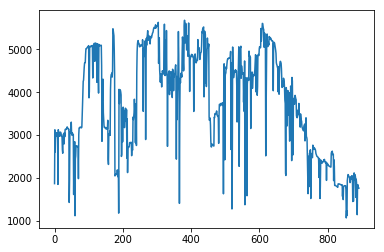

In [139]:
plt.plot(Y1)

In [140]:
y_pred_ = scaler_y.inverse_transform(model_ett.predict(x_forecast).reshape(-1,1))
trace1 = go.Scatter(x = Y1,
                    y = y_pred_.reshape(-1,),
                   name = "Actual",
                   mode = 'markers',
                   line=dict(width=10))
data = [trace1]
layout = {"title": "Forecasting"}
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [141]:
mse(model_ett.predict(x_forecast), y_forecast)

0.046070930710649556

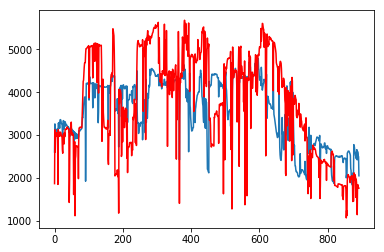

In [142]:
plt.plot(y_pred_)
plt.plot(Y1,'r')

In [143]:
x = np.arange(10)
scaler = MinMaxScaler()

In [144]:
x = scaler.fit_transform(x.reshape(-1,1))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [145]:

trace2 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_gbm.reshape(-1,),
                   name = "Gradient Boosting Machine",
                   mode = 'markers',
                   line=dict(width=10))
trace3 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_rf.reshape(-1,),
                   name = "Random Forest",
                   mode = 'markers',
                   line=dict(width=10))
trace4 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_xgb.reshape(-1,),
                   name = "Extreme Gradient Boosting",
                   mode = 'markers',
                   line=dict(width=10))
trace5 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_ett.reshape(-1,),
                   name = "Extra Trees Regression",
                   mode = 'markers',
                   line=dict(width=10))
trace6 = go.Scatter(x = y_act.reshape(-1,),
                    y = y_pred_dct.reshape(-1,),
                   name = "Decision Tree Regression",
                   mode = 'markers',
                   line=dict(width=10))
data = [ trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(showlegend = True,
    xaxis=dict(
        title='Actual oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Predicted oil rate (m3)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    )
)
fig = go.Figure(data=data, layout = layout)
py.iplot(fig)

In [146]:
y = np.arange(10,19)

In [147]:
y = scaler.transform(y.reshape(-1,1))

In [148]:
from sklearn.tree import export_graphviz

In [149]:
#export_graphviz(model_dct, out_file='dct.dot', feature_names = df.iloc[:,0:6].columns,
                #class_names = df.BORE_OIL_VOL,
                #rounded = True, proportion = False, precision = 2, filled = True)

In [150]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
#export_graphviz(model_dct, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [151]:
#graph.write_pdf("dct.pdf")

In [152]:
model_dct.feature_importances_

array([0.06665988, 0.72266135, 0.15315407, 0.05291065, 0.00219935,
       0.0024147 ])

In [153]:
model_ett.feature_importances_

array([0.06920849, 0.1759763 , 0.22366778, 0.0934146 , 0.25654907,
       0.18118376])

In [154]:
model_rf.feature_importances_

array([0.06284618, 0.72727467, 0.13925871, 0.04780817, 0.01734131,
       0.00547097])

In [155]:
GBoost.feature_importances_

array([0.12822818, 0.15433375, 0.17116932, 0.17663221, 0.17091338,
       0.19872316])

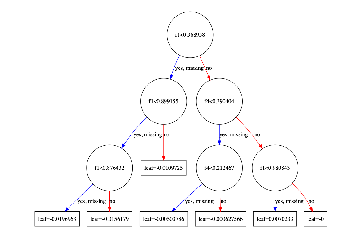

In [156]:
from xgboost import plot_tree
plot_tree(model_xgb, num_trees = 3)
plt.show()

In [157]:
model_rf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [158]:
export_graphviz(model_rf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
export_graphviz(model_rf.estimators_[0], out_file='tree_from_forest.dot')
(graph,) = pydotplus.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')

In [ ]:
df.columns[6]

In [ ]:
estimator = model_rf.estimators_[5]
tree_dot = StringIO()
export_graphviz(estimator, out_file=tree_dot, 
                feature_names = df.columns[0:6],
                class_names = df.columns[6],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
#graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())  
#Image(graph.create_png())

In [ ]:
#graph.write_pdf("rf.pdf")

In [ ]:
LR.fit(x_train,y_train)

In [ ]:
x_test[1]

In [ ]:
LR.predict(x_test)

In [ ]:
LR.coef_

In [ ]:
LR.intercept_

In [ ]:
model_ridge.coef_

In [ ]:
model_ridge.intercept_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


In [ ]:
from plotly import tools

import numpy as np
from sklearn import neighbors

In [ ]:
def data_to_plotly(x):
    k = []
    
    for i in range(0, len(x)):
        k.append(x[i][0])
        
    return k

In [ ]:
data = [[], []]
titles = []
n_neighbors = 3

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x_train, y_train).predict(x_test)
    
    if(i==0):
        leg=True
    else:
        leg=False
    
    p1 = go.Scatter(x=data_to_plotly(x_train), y=y, 
                    mode='markers', showlegend=leg,
                    marker=dict(color='black'),
                    name='data')
    
    p2 = go.Scatter(x=data_to_plotly(x_train), y=y_,
                    mode='lines', showlegend=leg,
                    line=dict(color='green'),
                    name='prediction')
    data[i].append(p1)
    data[i].append(p2)
    titles.append("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

In [ ]:
fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=tuple(titles), 
                          print_grid=False)

for i in range(0, len(data)):
    for j in range(0, len(data[i])):
        fig.append_trace(data[i][j], i+1, 1)

fig['layout'].update(height=700, hovermode='closest')

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, zeroline=False)
    fig['layout'][y].update(showgrid=False, zeroline=False)
                     
py.iplot(fig)

In [ ]:
model_svr.intercept_

In [ ]:
model_lsvr.coef_

In [ ]:
model_svr.dual_coef_

In [ ]:
model_svr.support_vectors_